<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment (Problem 2) - Sentiment Analysis Model (Group)</h2><h3>AY2019/20 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
import keras
import os
from keras import layers, models, optimizers, regularizers
from keras.layers import Embedding, SimpleRNN
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


## Step 1 – Data Loading and Processing (Group)

### 1.1 Data Loading

In [2]:
# Load the emoji_dictionary
import pandas as pd
df = pd.read_csv('Mapping.csv', delimiter=',')
emoji_dictionary = df.loc[:,'emoticons'].to_dict()
print(emoji_dictionary)
print('A total of: ', len(emoji_dictionary), 'Emoji Icons')

{0: '😍', 1: '😂', 2: '📷', 3: '🔥', 4: '❤'}
A total of:  5 Emoji Icons


In [3]:
# load the dataset
dat = pd.read_csv('dataset.csv', delimiter=',')
texts = dat.loc[:,'TEXT'].values 
labels = dat.loc[:,'Label'].values

In [4]:
# Check the maximum length of texts
max_len = -1
for example in texts:
    if len(example.split()) > max_len:
        max_len = len(example.split())
        
print('the maximum length of the text inputs is ', max_len)

the maximum length of the text inputs is  34


### 1.2 Data Processing


In [5]:
# Convert the texts and labels into numeric tensors
maxlen = 20  # We will cut reviews after 20 words
# training_samples = 20000  # We will be training on 20000 samples
# validation_samples = 5000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words (vocabulary) in the dataset (dictionary)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

X = pad_sequences(sequences, maxlen=maxlen)

y = np.asarray(labels)
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)

print(X[4])
print(y[4])

Shape of data tensor: (42546, 20)
Shape of label tensor: (42546,)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
 9219 3796   85 7468   68 1115]
0


### 1.3 Data Sampling

In [6]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)
# Refer the report Appendix
# Please enter the random_state assigned to your group

## Step 2 – Develop a Sentiment Analysis Model (Individual: One Model Per Student) 

### Model#1 (Student Name: Kevin Toh)

In [7]:
# Build the Model
model = models.Sequential()
model.add(layers.Embedding(10000, 16, input_length=maxlen))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 16)            160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 32)            6272      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 174,757
Trainable params: 174,757
Non-trainable params: 0
_________________________________________________________________




In [8]:
# Train the Model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 27228 samples, validate on 6808 samples
Epoch 1/10
27228/27228 [==============================] - 20s 746us/step - loss: 1.2910 - acc: 0.4572 - val_loss: 1.1508 - val_acc: 0.5101
Epoch 2/10
27228/27228 [==============================] - 17s 640us/step - loss: 1.0815 - acc: 0.5379 - val_loss: 1.0829 - val_acc: 0.5323
Epoch 3/10
27228/27228 [==============================] - 18s 655us/step - loss: 1.0043 - acc: 0.5743 - val_loss: 1.0544 - val_acc: 0.5583
Epoch 4/10
27228/27228 [==============================] - 17s 626us/step - loss: 0.9364 - acc: 0.6108 - val_loss: 1.0307 - val_acc: 0.5639
Epoch 5/10
27228/27228 [==============================] - 17s 641us/step - loss: 0.8828 - acc: 0.6348 - val_loss: 1.0309 - val_acc: 0.5708
Epoch 6/10
27228/27228 [==============================] - 18s 654us/step - loss: 0.8405 - acc: 0.6589 - val_loss: 1.0465 - val_acc: 0.5712
Epoch 7/10
27228/27228

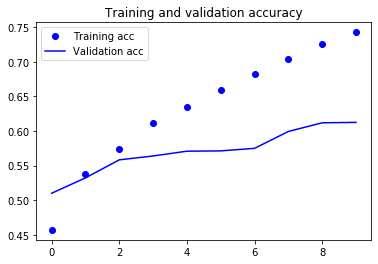

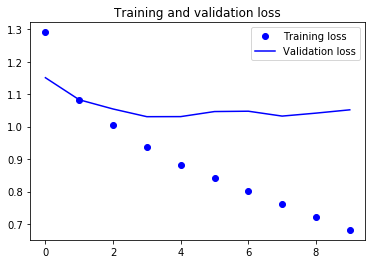

In [10]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
# Build the Model
model = models.Sequential()
model.add(layers.Embedding(10000, 16, input_length=maxlen))
model.add(layers.LSTM(256, return_sequences=True))
model.add(layers.LSTM(256))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 16)            160000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 20, 256)           279552    
_________________________________________________________________
lstm_6 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1285      
Total params: 966,149
Trainable params: 966,149
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Train the Model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 20s 749us/step - loss: 1.2494 - acc: 0.4747 - val_loss: 1.1022 - val_acc: 0.5270
Epoch 2/20
27228/27228 [==============================] - 18s 675us/step - loss: 1.0291 - acc: 0.5568 - val_loss: 1.0306 - val_acc: 0.5629
Epoch 3/20
27228/27228 [==============================] - 19s 686us/step - loss: 0.9337 - acc: 0.6094 - val_loss: 1.0114 - val_acc: 0.5799
Epoch 4/20
27228/27228 [==============================] - 18s 660us/step - loss: 0.8520 - acc: 0.6569 - val_loss: 1.0333 - val_acc: 0.5828
Epoch 5/20
27228/27228 [==============================] - 18s 674us/step - loss: 0.7846 - acc: 0.6944 - val_loss: 1.0039 - val_acc: 0.6112
Epoch 6/20
27228/27228 [==============================] - 18s 669us/step - loss: 0.7251 - acc: 0.7245 - val_loss: 1.0281 - val_acc: 0.6207
Epoch 7/20
27228/27228 [==============================] - 18s 649us/step - loss: 0.6782 - acc: 0.7443 - val_loss: 1.0

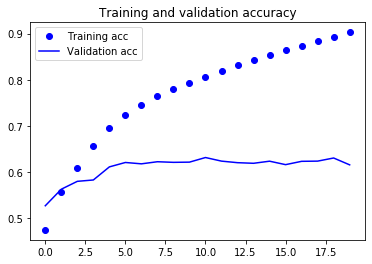

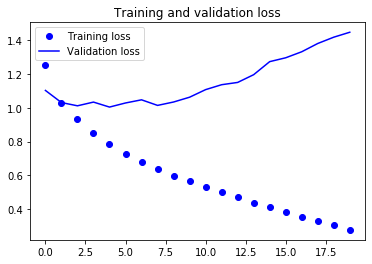

In [15]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
# Save the Model
model.save('text_model_1.h5')

### Model#2 (Student Name: XXXX)

In [ ]:
# Build the Model

In [ ]:
# Train the Model

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores

In [ ]:
# Save the Model
model.save('text_model_2.h5')

### Model#3 (Student Name: XXXX)

In [ ]:
# Build the Model

In [ ]:
# Train the Model

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores

In [ ]:
# Save the Model
model.save('text_model_3.h5')

### Model#4 (Student Name: XXXX)

In [ ]:
# Build the Model

In [ ]:
# Train the Model

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores

In [ ]:
# Save the Model
model.save('text_model_4.h5')

### Model#5 (Student Name: XXXX)

In [ ]:
# Build the Model

In [ ]:
# Train the Model

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores

In [ ]:
# Save the Model
model.save('text_model_5.h5')

## Step 3 – Evaluate the Model using Testing Data (Individual & Group)

In [ ]:
# Model #1
model.load_weights('text_model_1.h5')


In [ ]:
# Model #2
model.load_weights('text_model_2.h5')



In [ ]:
# Model #3
model.load_weights('text_model_3.h5')



In [ ]:
# Model #4
model.load_weights('text_model_4.h5')



In [ ]:
# Model #5
model.load_weights('text_model_5.h5')



In [ ]:
# Save the Best Model
model.save('text_model_best.h5')

## Step 4 – Use the Best Model to make prediction (Group)

In [ ]:
model.load_weights('text_model_best.h5')

In [ ]:
# takes the user input
text_input = np.array([input()])

In [ ]:
# convert the user input into numeric tensor


In [ ]:
# show the model output using predict function
